# Marketing A/B testing dataset
https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/data

Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

1. Would the campaign be successful?
2. If the campaign was successful, how much of that success could be attributed to the ads?

With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

# Assumptions

Since no success criteria was provided, an assumption was made for the campaign's success criteria. The campaign is considered **successful** if conversion rate in ad group is at least **20% higher** than psa group.

# Imports

In [147]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Load Dataset**

In [148]:
# Load dataset into a dataframe
df = pd.read_csv('data\marketing_AB.csv', index_col = 0)

# Display first few rows of the dataframe
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14



**Data dictionary:**
Variable  |Description |
-----|-----|
user id | User ID (unique)|
test group| If "ad" the person saw the advertisement; if "psa" they only saw the public service announcement|
converted| If a person bought the product then True, else is False|
total ads| Amount of ads seen by person|
most ads day| Day that the person saw the biggest amount of ads|
most ads hour| Hour of day that the person saw the biggest amount of ads|


# Data Discovery

In [149]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


- dataset has a total of 588101 rows and 6 columns
- each row represents a viewer
- each column displays the viewer's ad experience
- 3 Categorical Variables: test group, converted, most ads day 
- 3 Numerical Variables: user id, total ads,most ads hour 
- There are no null values 

**Size of Data**

In [150]:
# How large is he dataset
df.size

3528606

Dataset has 3.53M values

In [151]:
# Generate descriptive statistics 
df.describe(include='all')

,user id,test group,converted,total ads,most ads day,most ads hour
count,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,2,2,NaN,7,NaN
top,NaN,ad,False,NaN,Friday,NaN
freq,NaN,564577,573258,NaN,92608,NaN
mean,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


User Id
- There are a total of 588,101 users included in this data set.

Test Group
- The data consists of users from two different test groups.
- The majority of users (564,577) belong to the ad group.

Converted
- There are two conversion categories: "True" for those who purchased the product and "False" for those who didn't.
- The majority of users (approximately 97%) fall under the "False" category, meaning they haven't converted yet. 
- This suggests a low conversion rate overall.

Total Ads (watched by a user)
- On average, users watch nearly 25 ads.
- However, the median is only 13 ads, indicating that a small number of users watch a very high number of ads, skewing the average.
- The maximum number of ads watched by a single user is 2,065, further supporting the rightward skew in the data.

Most Ads (watched per) Day
- Data for seven days of the week is included (presumably Monday through Sunday).
- Friday is the day when users watch the most ads on average.

Most Ads (watched per) Hour
- The average number of ads watched per hour (14.5) is close to the median (14), suggesting a relatively balanced distribution of ad watching throughout the day.

# Data Cleaning

**Check for duplicates**


In [152]:
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

df_row = len(df)
df_row_no_dupe = len(df.drop_duplicates())
df_row_dupe = df_row - df_row_no_dupe

print('No. of rows with duplicates :', df_row_dupe)

Shape of dataframe: (588101, 6)
Shape of dataframe with duplicates dropped: (588101, 6)
No. of rows with duplicates : 0


**Check for Outliers**

In [153]:
# Separate numerical and categorical variables into different df
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print('numeric variables:', num_cols)
print('')

# Loop to cycle through numerical columns and create IQR for each column
for col in num_cols:
    print(col) #Print column name
    percentile25 = df[col].quantile(0.25) # Compute the 25th percentile value 
    percentile75 = df[col].quantile(0.75) # Compute the 75th percentile value   
    iqr = percentile75 - percentile25 # Compute the interquartile range
    
    # Define the upper limit and lower limit for non-outlier values in ``
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print('LL:', lower_limit, '|', 'UL:', upper_limit)

    # Identify subset of data containing outliers
    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]

    # Count how many rows in the data contain outliers 
    print('Rows of outliers :', len(outliers))
    percent_out = (len(outliers)/df.shape[0]) *100
    print(f'Percent outliers : {percent_out:.2f}%')
    print('')

numeric variables: ['user id', 'total ads', 'most ads hour']

user id
LL: 631843.0 | UL: 1995435.0
Rows of outliers : 0
Percent outliers : 0.00%

total ads
LL: -30.5 | UL: 61.5
Rows of outliers : 52057
Percent outliers : 8.85%

most ads hour
LL: 0.5 | UL: 28.5
Rows of outliers : 5536
Percent outliers : 0.94%



- there's a relatively high number of outliers for the `total_ads` feature. These outliers represent approximately 9% of the total data, which is quite substantial.
- In contrast, the most_ads_hour has a much lower proportion of outliers, only around 0.94% of the total data

**Rename columns to remove the space**

In [154]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


# Exploratory Data Analysis

In [155]:
# Import functions for plotting
from plots import *

**Check unique values for categorical variables**

### test_group

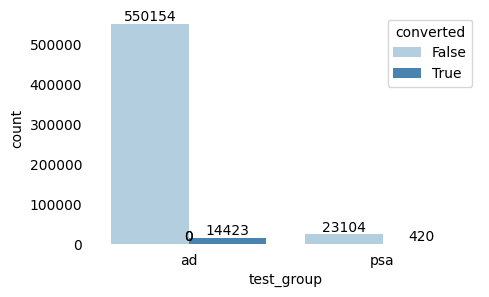

In [156]:
# Countplot function
ctplt(df,'test_group',None,5,3,None,0,'n',False,'y','#','converted')

- the 2 test groups are: ad and psa
- 96% of viewers belong to the Ad group.
- Around 14,000 viewers purchased the product after seeing the Ad.
- Only 420 viewers purchased from the PSA group.

**Calculate the conversion rate for each group**

conversion rate: the number of viewers that purchased the product out of the total group size

In [157]:
# save test_group values to list
groups = df['test_group'].unique().tolist()

# Calculate conversion in each test group
def calculate_conversion_rate_difference(df, groups):
  """
  This function calculates the conversion rate for each group in the provided DataFrame 'df' 
  and the difference in conversion rate between consecutive groups specified in 'groups' list.

      df (pandas.DataFrame): The DataFrame containing 'test_group' and 'converted' columns.
      groups (list): A list containing the group names for which conversion rates are to be calculated.

  Returns:
      None: The function prints the conversion rate for each group and the difference between it and the previous group's rate.
  """

  prev_percent_convert = None

  for group in groups:
    count = df[(df['test_group'] == group)].shape[0]
    convert_count = df[(df['test_group'] == group) & (df['converted'] == True)].shape[0]
    percent_convert = (convert_count / count) * 100
    print(f'Conversion rate in {group} group:  {percent_convert:.2f}%')

    if prev_percent_convert is not None:
      percent_difference = ((prev_percent_convert-percent_convert)/percent_convert) *100
      print(f'% Difference between the conversion rates: {percent_difference:.1f}%')

    prev_percent_convert = percent_convert
# apply function
calculate_conversion_rate_difference(df.copy(), groups.copy())

Conversion rate in ad group:  2.55%
Conversion rate in psa group:  1.79%
% Difference between the conversion rates: 43.1%


Our analysis revealed that viewers who watched the advertisement (Ad group) achieved a conversion rate **43% higher** compared to the Public Service Announcement (PSA group).

**Success Criteria:**

We previously defined a success criterion for this campaign: the Ad group's conversion rate should be at least 20% higher than the PSA group.

**Result**

Since the Ad group's conversion rate surpasses the 20% threshold, exceeding it by an impressive 43%, we can confidently conclude that this campaign is a success.

## `converted`

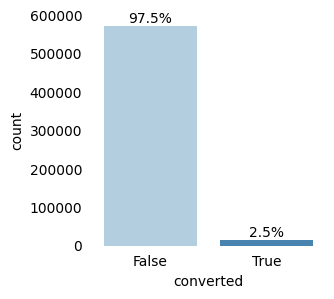

In [158]:
# Countplot function
ctplt(df,'converted',None,3,3,None,0,'n',False,'y','%',None)

- False indicate the viewers did not purchase the product
- While a significant portion (93.5%) of users saw the ads, the actual purchase rate was low. 
- Only 2.5% of viewers converted into paying customers.

## `total ads (watched)`

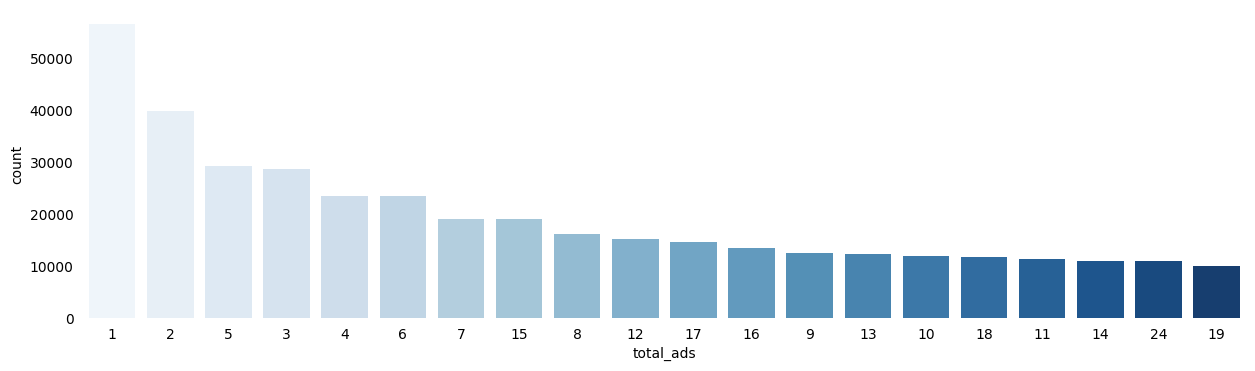

In [235]:
ctplt(df,'total_ads',None,15,4,20,0,'n',False,'n','',None)

data for total_ads follow a log normal distribution with most viewers watching a total of 1-5 ads  

**Create violinplot showing distributions of total ads watch by viewers in the 2 test groups and their conversion**

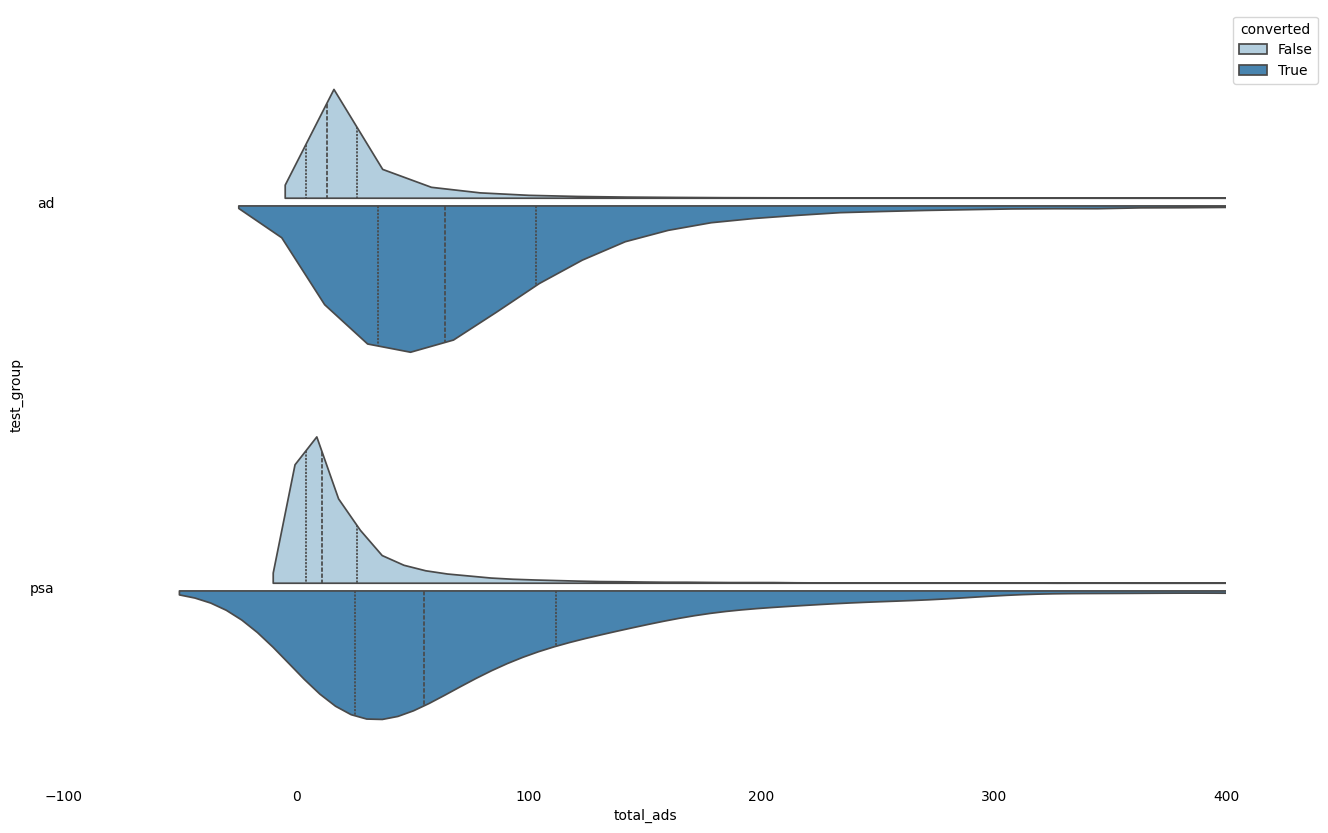

In [236]:
fig = plt.figure(figsize=(15,10))
ax = sns.violinplot(data=df, x='total_ads',y='test_group', hue='converted', palette='Blues', split="True", inner='quart', gap=0.05)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # legend location
sns.despine(left=True, bottom=True) # Remove borders 
ax.tick_params(left=False, bottom=False) # Remove ticks
ax.set_xlim(-100,400)
plt.show()

**Calculate the Statistics for this group**

In [230]:
df.groupby(by=['test_group','converted'])[['total_ads']].describe()

total_ads                                                 \
                         count       mean        std  min   25%   50%     75%   
test_group converted                                                            
ad         False      550154.0  23.274449  40.861306  1.0   4.0  13.0   26.00   
           True        14423.0  83.905567  87.504179  1.0  35.0  64.0  103.00   
psa        False       23104.0  23.697412  40.906459  1.0   4.0  11.0   26.00   
           True          420.0  83.276190  85.867161  1.0  25.0  55.0  111.75   

                              
                         max  
test_group converted          
ad         False      2065.0  
           True       1778.0  
psa        False       907.0  
           True        563.0

- On average, people who made a purchase (converted) after seeing ads watched more ads overall compared to those who didn't buy anything.
    - the viewers in ad group watch an average of 64 ads while those in the psa group watch 55 ads on average.  
- For both groups, those who did not convert watch less ads in total (11-13 ads).

From the violin plot, 75% of viewers who converted in both ad and psa groups watched less than 112 ads in total. Additionally, the conversion rate also gradually  decreased as viewers watch over 100 ads in total.

In other words, there seems to be a sweet spot in terms of ad exposure for achieving conversions. Viewers who see too few ads might not be sufficiently informed about the product, while those who are exposed to too many ads might become overwhelmed or tune out altogether. This suggests that it's important to find the right balance between ad exposure and viewer engagement to optimize conversion rates.

## `most_ads_day`

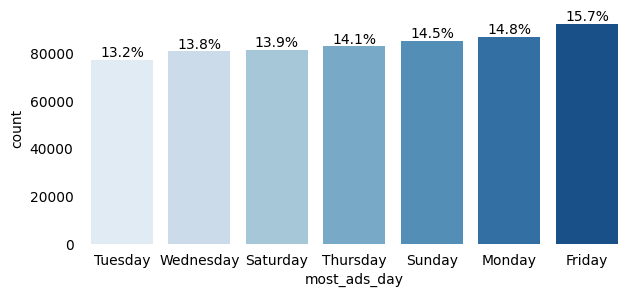

In [70]:
# Countplot function
ctplt(df,'most_ads_day',None,7,3,None,None,'n',True,'y','%',None)

- Ad engagement is fairly consistent throughout the weekdays, with Fridays seeing a slight bump (15.7%) and Tuesdays seeing a slight dip (13.2%). 
- Overall, ad viewership falls within a narrow range of 13% to 15.7% across all days.

In [71]:
# Calculate conversion rate/day
days = df['most_ads_day'].unique().tolist()

for day in days:
    count = df[(df['most_ads_day'] == day)].shape[0]
    convert_count = df[(df['most_ads_day'] == day) & (df['converted'] == 1)].shape[0]
    percent_convert = (convert_count/count) * 100
    print(f'Conversion rate on {day} {percent_convert:.1f}%')

Conversion rate on Monday 3.3%
Conversion rate on Tuesday 3.0%
Conversion rate on Friday 2.2%
Conversion rate on Saturday 2.1%
Conversion rate on Wednesday 2.5%
Conversion rate on Sunday 2.4%
Conversion rate on Thursday 2.2%


- Conversion rates remain consistently low across all days of the week
- Monday has the highest rate at a modest 3.3% 
- Saturdays see the lowest conversion rate at just 2.1%

## `most_ads_hour`

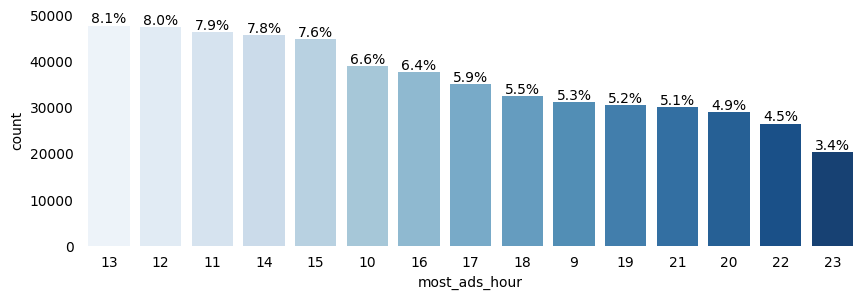

In [72]:
# Countplot function
ctplt(df,'most_ads_hour',None,10,3,15,0,'n',False,'y','%',None)

- Ad viewership are highest around noon time (11AM-3PM), potentially coinciding with lunchtime breaks.
- Engagement remains low throughout the overnight hours (12:00 AM to 7:00 AM) as viewers are probably asleep.

# AB Testing

**Handle Outliers**

In [76]:
outliers

,user id,test group,converted,total ads,most ads day,most ads hour
46,1086831,ad,False,71,Wednesday,0
118,1086334,ad,False,103,Sunday,0
120,1228652,ad,False,407,Friday,0
205,909288,psa,False,22,Friday,0
360,1080071,ad,False,209,Tuesday,0
...,...,...,...,...,...,...
584639,1004190,ad,False,1,Tuesday,0
584640,1028589,ad,False,1,Tuesday,0
584641,1536866,ad,False,1,Tuesday,0
584642,1089798,ad,False,1,Tuesday,0


## The Chi-Squared Test for Independence
- hypothesis test that determines whether or not `two categorical variables` are **associated** with each other.


**1. State the null hypothesis and the alternative hypothesis.**
- H0: There **IS NO** association between `test group` and `viewer conversion`
- Ha: There **IS** association between `test group` and `viewer conversion`

**2. Calculate the chi-squared test statistic (𝛘2)**

In [73]:
contingency_table = pd.crosstab(df['converted'], df['test_group'], margins=True)
contingency_table

test_group,ad,psa,All
converted,,,
False,550154,23104,573258
True,14423,420,14843
All,564577,23524,588101


In [74]:
from scipy.stats import chi2_contingency

# Perform the chi-square test
chi2_statistic, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table.values)

# Print the results
print(f'Chi-Square Statistic: {chi2_statistic:.2f}')
print(f'p-value: {pval:.2e}')
print("Degrees of Freedom:", degrees_of_freedom)
print("Expected Counts:\n", expected_counts)

Chi-Square Statistic: 54.32
p-value: 4.51e-11
Degrees of Freedom: 4
Expected Counts:
 [[550327.71899045  22930.28100955 573258.        ]
 [ 14249.28100955    593.71899045  14843.        ]
 [564577.          23524.         588101.        ]]


**4. Make a conclusion**

Your p-value helps you determine whether a result is statistically significant. 
- low p-value indicates high statistical significance
- high p-value indicates low or no statistical significance

In [75]:
# Interpretation (adjust based on your significance level)
if pval < 0.05:
  print("Reject null hypothesis: There is a statistically significant relationship between the two variables.")
else:
  print("Fail to reject null hypothesis: There is no evidence of a statistically significant relationship between the two variables.")

Reject null hypothesis: There is a statistically significant relationship between the two variables.


# Conclusion

The chi-square test statistic and its associated p-value (4.51e-11) provide strong evidence to reject the null hypothesis. This indicates a statistically significant relationship between the test group and conversion rates. In other words, the observed uplift in conversions can be attributed to the ad campaign, and not simply due to chance.

# Recommendations

The data suggests there is an optimal range of ad exposure for achieving conversions. Seeing too few ads might leave viewers uninformed, while ad overload can lead to disengagement. Ad spending is high and the data shows viewers are most receptive around the 64-ad mark. To optimize the budget, consider reducing ad frequency and potentially achieve similar results with a lower cost.

Additionally, tailoring ad frequency based on viewer behavior like airing more during 11AM - 3PM and less in the early mornings could be beneficial.
